In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('D:/Prog/ML/datasets/data/new_features.csv')
add_df = pd.read_csv('D:/Prog/ML/datasets/data/new_features_add.csv')

In [93]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,d4_xp,d4_gold,d4_kills,d4_deaths,d5_hero,d5_xp,d5_gold,d5_kills,d5_deaths,radiant_win
0,11,2098,1489,0,0,67,842,991,0,0,...,742,500,0,0,84,958,1003,1,0,1
1,42,1188,1033,0,1,49,1596,993,0,1,...,440,583,0,0,12,1470,1622,0,0,1
2,33,1319,1270,0,0,98,1314,775,0,0,...,1319,667,0,0,80,1350,1512,0,0,0
3,29,1779,1056,0,0,30,539,539,0,0,...,674,537,0,0,20,510,499,0,0,0
4,13,1431,1090,1,0,27,629,552,0,1,...,1815,1275,0,0,8,1119,904,0,1,0


In [94]:
add_df.head()

,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,...,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,...,221.0,3,4,2,2,-52.0,1796,0,51,0
1,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,...,195.0,5,4,3,1,-5.0,1974,0,63,1
2,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,...,221.0,3,4,3,1,13.0,0,1830,0,63
3,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,...,184.0,0,4,2,0,27.0,1920,2047,50,63
4,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,...,225.0,6,3,3,0,-16.0,4,1974,3,63


In [154]:
radiant_win = df['radiant_win']

1    50273
0    46670
Name: radiant_win, dtype: int64

In [101]:
df_heroes = df.iloc[:,[i for i in range(0,50,5)]]
df_heroes.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero
0,11,67,29,20,105,4,42,21,37,84
1,42,49,67,37,26,39,88,79,7,12
2,33,98,20,27,4,22,66,86,29,80
3,29,30,75,37,41,96,48,15,102,20
4,13,27,30,72,93,26,69,22,25,8


In [160]:
def creating_set_of_hero(hero, df_heroes):
    mas_of_existing_hero = pd.Series(False for i in range(len(radiant_win)))
    for column in df_heroes.columns:
        mas_of_existing_hero = (mas_of_existing_hero) | (df_heroes[column] == hero)
    print(hero, len(df_heroes[mas_of_existing_hero]))
    return df_heroes[mas_of_existing_hero]

def creating_probability_of_hero(df_hero, radiant_win, hero):
    df_hero = pd.concat([df_hero, radiant_win], axis=1, sort=False).dropna()
    df_winrate = pd.Series()
    for column in df_hero.columns[:-1]:
        if column[0] == 'r':
            df_winrate = pd.concat([df_winrate, df_hero[df_hero[column] == hero]['radiant_win']]) 
        else:
            df_winrate = pd.concat([df_winrate, df_hero[df_hero[column] == hero]['radiant_win'].map({0:1,1:0})])
    try:
        return(df_winrate.value_counts()[1]/len(df_winrate))
    except:
        return 0

dict_of_probab = dict()
for hero in range(1,113): #113
    df_hero = creating_set_of_hero(hero, df_heroes)
    dict_of_probab.update({hero:creating_probability_of_hero(df_hero, radiant_win, hero)})
dict_of_probab

1 10744
2 6022
3 10911
4 5156
5 7556
6 3948
7 42243
8 16547
9 2699
10 1181
11 36864
12 9868
13 3293
14 2747
15 6041
16 3491
17 7588
18 5790
19 7143
20 9336
21 23918
22 7670
23 1944
24 0
25 22408
26 19200
27 5589
28 19501
29 7563
30 22321
31 10235
32 1610
33 2934
34 2270
35 2053
36 3860
37 3470
38 3267
39 30549
40 3497
41 3639
42 10730
43 2622
44 4667
45 2081
46 11463
47 12439
48 3947
49 4404
50 34504
51 18324
52 6835
53 1751
54 2385
55 25265
56 5042
57 7001
58 602
59 8591
60 15581
61 2918
62 9664
63 2331
64 4579
65 2048
66 816
67 7228
68 17196
69 8259
70 4815
71 25966
72 34369
73 9384
74 11798
75 12521
76 1764
77 1172
78 1371
79 2899
80 762
81 3415
82 1690
83 1727
84 6975
85 22327
86 16915
87 17475
88 3698
89 2974
90 2705
91 4275
92 2420
93 7990
94 3977
95 1741
96 5195
97 7812
98 3331
99 10425
100 28425
101 4947
102 3289
103 712
104 3751
105 1481
106 18650
107 0
108 0
109 173
110 8342
111 0
112 35833


{1: 0.4979523454951601,
 2: 0.4116572567253404,
 3: 0.4789661809183393,
 4: 0.5056245151280062,
 5: 0.5199841185812599,
 6: 0.5476190476190477,
 7: 0.5030892692280378,
 8: 0.5164078080618844,
 9: 0.4794368284549833,
 10: 0.4640135478408129,
 11: 0.5349934895833334,
 12: 0.4684839886501824,
 13: 0.40783480109322806,
 14: 0.47251547142337097,
 15: 0.5000827677536832,
 16: 0.44829561730163275,
 17: 0.48010015814443857,
 18: 0.49015544041450776,
 19: 0.4787904241915162,
 20: 0.515745501285347,
 21: 0.48110209883769545,
 22: 0.5486310299869622,
 23: 0.45627572016460904,
 24: 0,
 25: 0.4641199571581578,
 26: 0.4540104166666667,
 27: 0.4834496332080873,
 28: 0.5294087482693195,
 29: 0.448895940764247,
 30: 0.5159715066529278,
 31: 0.5482169027845628,
 32: 0.5229813664596273,
 33: 0.4788684389911384,
 34: 0.46784140969162996,
 35: 0.4559181685338529,
 36: 0.5339378238341969,
 37: 0.49164265129683,
 38: 0.5133149678604224,
 39: 0.47176666994009625,
 40: 0.5273091221046612,
 41: 0.40752954108271

In [163]:
for column in df_heroes.columns:
    df[column] = df_heroes[column].map(dict_of_probab)

In [164]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,d4_xp,d4_gold,d4_kills,d4_deaths,d5_hero,d5_xp,d5_gold,d5_kills,d5_deaths,radiant_win
0,0.534993,2098,1489,0,0,0.556309,842,991,0,0,...,742,500,0,0,0.476129,958,1003,1,0,1
1,0.535601,1188,1033,0,1,0.492961,1596,993,0,1,...,440,583,0,0,0.468484,1470,1622,0,0,1
2,0.478868,1319,1270,0,0,0.447613,1314,775,0,0,...,1319,667,0,0,0.505249,1350,1512,0,0,0
3,0.448896,1779,1056,0,0,0.515972,539,539,0,0,...,674,537,0,0,0.515746,510,499,0,0,0
4,0.407835,1431,1090,1,0,0.483450,629,552,0,1,...,1815,1275,0,0,0.516408,1119,904,0,1,0


In [218]:
df_xp = df.iloc[:,[i for i in range(1,50,5)]]
df_xp.head()

,r1_xp,r2_xp,r3_xp,r4_xp,r5_xp,d1_xp,d2_xp,d3_xp,d4_xp,d5_xp
0,2098,842,1909,757,732,1058,1085,2052,742,958
1,1188,1596,1506,669,415,1960,640,720,440,1470
2,1319,1314,1297,2360,1395,2305,1024,755,1319,1350
3,1779,539,2037,591,712,1878,732,1681,674,510
4,1431,629,884,925,1482,704,1169,1055,1815,1119


In [192]:
df['sum_radiant_xp'] = df_xp.iloc[:,:5].sum(axis=1)
df['sum_dire_xp'] = df_xp.iloc[:,5:10].sum(axis=1)
df['difference_xp'] = df_xp.iloc[:,:5].sum(axis=1) - df_xp.iloc[:,5:10].sum(axis=1)

In [193]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,d5_hero,d5_xp,d5_gold,d5_kills,d5_deaths,radiant_win,difference,difference_xp,sum_radiant_xp,sum_dire_xp
0,0.534993,2098,1489,0,0,0.556309,842,991,0,0,...,0.476129,958,1003,1,0,1,443,443,6338,5895
1,0.535601,1188,1033,0,1,0.492961,1596,993,0,1,...,0.468484,1470,1622,0,0,1,144,144,5374,5230
2,0.478868,1319,1270,0,0,0.447613,1314,775,0,0,...,0.505249,1350,1512,0,0,0,932,932,7685,6753
3,0.448896,1779,1056,0,0,0.515972,539,539,0,0,...,0.515746,510,499,0,0,0,183,183,5658,5475
4,0.407835,1431,1090,1,0,0.483450,629,552,0,1,...,0.516408,1119,904,0,1,0,-511,-511,5351,5862


In [207]:
df_gold = df.iloc[:,[i for i in range(2,50,5)]]
df_gold.head()

df['sum_radiant_gold'] = df_gold.iloc[:,:5].sum(axis=1)
df['sum_dire_gold'] = df_gold.iloc[:,5:10].sum(axis=1)
df['difference_gold'] = df_gold.iloc[:,:5].sum(axis=1) - df_xp.iloc[:,5:10].sum(axis=1)

In [195]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,d5_kills,d5_deaths,radiant_win,difference,difference_xp,sum_radiant_xp,sum_dire_xp,sum_radiant_gold,sum_dire_gold,difference_gold
0,0.534993,2098,1489,0,0,0.556309,842,991,0,0,...,1,0,1,443,443,6338,5895,5022,5021,1
1,0.535601,1188,1033,0,1,0.492961,1596,993,0,1,...,0,0,1,144,144,5374,5230,4698,5505,-807
2,0.478868,1319,1270,0,0,0.447613,1314,775,0,0,...,0,0,0,932,932,7685,6753,6677,5786,891
3,0.448896,1779,1056,0,0,0.515972,539,539,0,0,...,0,0,0,183,183,5658,5475,4308,4729,-421
4,0.407835,1431,1090,1,0,0.483450,629,552,0,1,...,0,1,0,-511,-511,5351,5862,4888,5068,-180


In [200]:
df_xp.head()

,r1_gold,r2_gold,r3_gold,r4_gold,r5_gold,d1_gold,d2_gold,d3_gold,d4_gold,d5_gold
0,400,499,499,499,499,499,499,499,499,499
1,499,499,499,499,499,499,499,499,499,499
2,499,499,499,499,499,499,499,499,499,499
3,499,499,499,499,499,499,499,499,499,499
4,499,499,499,499,499,499,499,499,499,499


In [219]:
df_r_xp = df_xp.iloc[:,:5]
df_d_xp = df_xp.iloc[:,5:10]
df_r_xp.head()

,r1_xp,r2_xp,r3_xp,r4_xp,r5_xp
0,2098,842,1909,757,732
1,1188,1596,1506,669,415
2,1319,1314,1297,2360,1395
3,1779,539,2037,591,712
4,1431,629,884,925,1482


In [227]:
values_r_xp = df_r_xp.values
values_d_xp = df_d_xp.values

values_r_xp.sort(axis=1)
values_d_xp.sort(axis=1)

values_r_xp = values_r_xp[:, ::-1]
values_d_xp = values_d_xp[:, ::-1]

df_r_xp = pd.DataFrame(values_r_xp, df_r_xp.index, df_r_xp.columns)
df_d_xp = pd.DataFrame(values_d_xp, df_d_xp.index, df_d_xp.columns)

df_r_xp_top = df_r_xp.iloc[:,:2]
df_d_xp_top = df_d_xp.iloc[:,:2]

df_r_xp_low = df_r_xp.iloc[:,-2:]
df_d_xp_low = df_d_xp.iloc[:,-2:]

df['diff_btw_2_top_xp'] = df_r_xp_top.sum(axis=1) - df_d_xp_top.sum(axis=1)
df['diff_btw_2_low_xp'] = df_r_xp_low.sum(axis=1) - df_d_xp_low.sum(axis=1)

In [230]:
df_gold = df.iloc[:,[i for i in range(2,50,5)]]
df_gold.head()

df_r_gold = df_gold.iloc[:,:5]
df_d_gold = df_gold.iloc[:,5:10]

In [231]:
values_r_gold = df_r_gold.values
values_d_gold = df_d_gold.values

values_r_gold.sort(axis=1)
values_d_gold.sort(axis=1)

values_r_gold = values_r_gold[:, ::-1]
values_d_gold = values_d_gold[:, ::-1]

df_r_gold = pd.DataFrame(values_r_gold, df_r_gold.index, df_r_gold.columns)
df_d_gold = pd.DataFrame(values_d_gold, df_d_gold.index, df_d_gold.columns)

df_r_gold_top = df_r_gold.iloc[:,:2]
df_d_gold_top = df_d_gold.iloc[:,:2]

df_r_gold_low = df_r_gold.iloc[:,-2:]
df_d_gold_low = df_d_gold.iloc[:,-2:]

df['diff_btw_2_top_gold'] = df_r_gold_top.sum(axis=1) - df_d_gold_top.sum(axis=1)
df['diff_btw_2_low_gold'] = df_r_gold_low.sum(axis=1) - df_d_gold_low.sum(axis=1)

In [232]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,difference_xp,sum_radiant_xp,sum_dire_xp,sum_radiant_gold,sum_dire_gold,difference_gold,diff_btw_2_top_xp,diff_btw_2_low_xp,diff_btw_2_top_gold,diff_btw_2_low_gold
0,0.534993,2098,1489,0,0,0.556309,842,991,0,0,...,443,6338,5895,5022,5021,2527,870,-211,93,-87
1,0.535601,1188,1033,0,1,0.492961,1596,993,0,1,...,144,5374,5230,4698,5505,2203,-328,4,-471,21
2,0.478868,1319,1270,0,0,0.447613,1314,775,0,0,...,932,7685,6753,6677,5786,4182,100,832,183,397
3,0.448896,1779,1056,0,0,0.515972,539,539,0,0,...,183,5658,5475,4308,4729,1813,257,-54,-428,2
4,0.407835,1431,1090,1,0,0.483450,629,552,0,1,...,-511,5351,5862,4888,5068,2393,-71,-246,-411,208


In [233]:
add_df.head()

,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,...,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,...,221.0,3,4,2,2,-52.0,1796,0,51,0
1,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,...,195.0,5,4,3,1,-5.0,1974,0,63,1
2,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,...,221.0,3,4,3,1,13.0,0,1830,0,63
3,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,...,184.0,0,4,2,0,27.0,1920,2047,50,63
4,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,...,225.0,6,3,3,0,-16.0,4,1974,3,63


In [235]:
add_df['radiant_flying_courier_time'].value_counts(dropna=False)

NaN      27192
181.0     5170
180.0     4045
182.0     2708
183.0     2133
184.0     1723
185.0     1509
186.0     1322
187.0     1194
188.0     1147
189.0     1062
190.0      999
191.0      987
192.0      971
193.0      902
194.0      900
197.0      886
195.0      870
196.0      852
198.0      828
200.0      823
202.0      796
204.0      796
201.0      787
199.0      776
203.0      776
205.0      762
206.0      731
207.0      718
208.0      693
         ...  
268.0      294
267.0      293
270.0      293
273.0      282
271.0      276
289.0      270
275.0      270
279.0      263
276.0      259
285.0      258
281.0      257
278.0      250
280.0      250
284.0      248
298.0      245
286.0      244
292.0      240
287.0      239
290.0      239
295.0      237
299.0      236
297.0      236
294.0      236
300.0      233
288.0      228
283.0      228
291.0      227
282.0      222
293.0      213
296.0      211
Name: radiant_flying_courier_time, Length: 122, dtype: int64

In [236]:
add_df['radiant_courier_time'].value_counts(dropna=False) #150

-86.0     11687
-85.0     11248
-87.0     10295
-84.0      9806
-83.0      7871
-82.0      6243
-81.0      4908
-88.0      4428
-80.0      3984
-79.0      3285
-78.0      2791
-77.0      2371
-76.0      2017
-75.0      1637
-74.0      1443
-73.0      1284
-72.0      1079
-71.0       956
-70.0       811
-69.0       747
-68.0       647
-89.0       635
-67.0       598
-66.0       513
-65.0       481
 NaN        406
-64.0       397
-63.0       347
-62.0       326
-61.0       323
          ...  
 280.0        1
 268.0        1
 171.0        1
 270.0        1
 232.0        1
 287.0        1
 188.0        1
 237.0        1
 146.0        1
 223.0        1
 141.0        1
 252.0        1
 46.0         1
 239.0        1
 183.0        1
 97.0         1
 218.0        1
 154.0        1
 196.0        1
 236.0        1
 133.0        1
 219.0        1
 264.0        1
 295.0        1
 284.0        1
 269.0        1
 156.0        1
 282.0        1
 211.0        1
 106.0        1
Name: radiant_courier_ti

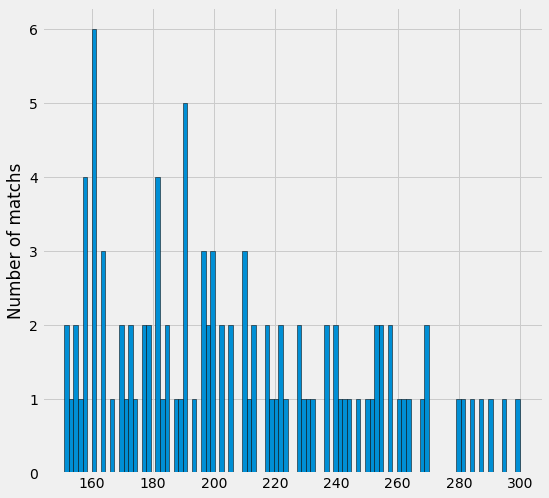

In [250]:
def plot_hist(Series):
    plt.figure(figsize = (8,8))

    plt.style.use('fivethirtyeight')
    plt.hist(Series, bins=100, edgecolor='k')
    plt.ylabel('Number of matchs')
plot_hist(add_df[add_df['radiant_courier_time']>150]['radiant_courier_time'])

In [267]:
df['late_r_courier'] = pd.Series(add_df['radiant_courier_time'] > 150).astype('int')
df['early_r_courier'] = pd.Series(add_df['radiant_courier_time'] < 150).astype('int')
df['no_r_courier'] = pd.Series(add_df['radiant_courier_time'].fillna(-1000) == -1000).astype('int')
df['late_d_courier'] = pd.Series(add_df['dire_courier_time'] > 150).astype('int')
df['early_d_courier'] = pd.Series(add_df['dire_courier_time'] < 150).astype('int')
df['no_d_courier'] = pd.Series(add_df['dire_courier_time'].fillna(-1000) == -1000).astype('int')

In [268]:
df.head()

,r1_hero,r1_xp,r1_gold,r1_kills,r1_deaths,r2_hero,r2_xp,r2_gold,r2_kills,r2_deaths,...,diff_btw_2_low_gold,late_courier,early_courier,no_courier,late_r_courier,early_r_courier,no_r_courier,late_d_courier,early_d_courier,no_d_courier
0,0.534993,2098,1489,0,0,0.556309,842,991,0,0,...,-87,0,1,0,0,1,0,0,1,0
1,0.535601,1188,1033,0,1,0.492961,1596,993,0,1,...,21,0,1,0,0,1,0,0,1,0
2,0.478868,1319,1270,0,0,0.447613,1314,775,0,0,...,397,0,1,0,0,1,0,0,1,0
3,0.448896,1779,1056,0,0,0.515972,539,539,0,0,...,2,0,1,0,0,1,0,0,1,0
4,0.407835,1431,1090,1,0,0.483450,629,552,0,1,...,208,0,1,0,0,1,0,0,1,0


In [271]:
df[df['no_r_courier'] == 1]['radiant_win'].value_counts()

0    207
1    199
Name: radiant_win, dtype: int64

In [270]:
df['no_d_courier'].value_counts()

0    96553
1      390
Name: no_d_courier, dtype: int64